In [45]:
summit bikram nayak
2011167
22.02.2024



import midsem_library as lib
import math
import numpy as np
import matplotlib.pyplot as plt

Question 1

f(x)=log(x/2)-sin(5x/2)

output:
2.201303235202167(regula falsi)
2.201303164388981(newtom raphson,1.5)
2.2013031648600205(newton_raphson,2.5)



In [46]:
def f1(x):
    f = math.log(x/2) - math.sin(math.radians((5*x)/2))
    return f

In [47]:
a = 1.5
b = 2.5
nr_guess = 2
precision = 1e-6

rf_root, rf_list_i, rf_list_f_i, rf_abs_err = lib.regulafalsi(f1, a, b, precision)
nr_root_a, nr_list_i_a, nr_abs_err_a = lib.newtonraphson(f1, a, precision)
nr_root_b, nr_list_i_b, nr_abs_err_b = lib.newtonraphson(f1, b, precision)

print(rf_root)
print(nr_root_a)
print(nr_root_b)



2.201303235202167
2.201303164388981
2.2013031648600205


In [48]:
#print("Convergence table for solution obtained using Regula-Falsi method")
#ml.showConvergenceTable(rf_list_i, rf_abs_err)

#print("Convergence table for solution obtained using Newton-Raphson method (initial guess = 1.5)")
#ml.showConvergenceTable(nr_list_i_a, nr_abs_err_a)

#print("Convergence table for solution obtained using Newton-Raphson method (initial guess = 2.5)")
#ml.showConvergenceTable(nr_list_i_b, nr_abs_err_b)

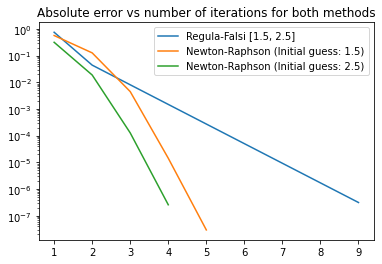

In [49]:
plt.plot(rf_list_i, rf_abs_err, label='Regula-Falsi [1.5, 2.5]')
plt.plot(nr_list_i_a, nr_abs_err_a, label='Newton-Raphson (Initial guess: 1.5)')
plt.plot(nr_list_i_b, nr_abs_err_b, label='Newton-Raphson (Initial guess: 2.5)')
plt.title("Absolute error vs number of iterations for both methods")
plt.yscale("log")
plt.legend()

Question 2



Temperature reaches 100 C at x = 0.37373737373737376

In [50]:
import numpy as np
from scipy.optimize import root

# Constants
alpha = 0.01
Ta = 20
T0 = 40
TL = 200

# Differential equation
def diff_eq(y, x):
    T, z = y
    dydx = [z, alpha * (Ta - T)]
    return dydx

# Runge-Kutta 4 method
def rk4(func, y0, x):
    n = len(x)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = x[i+1] - x[i]
        k1 = h * np.asarray(func(y[i], x[i]))
        k2 = h * np.asarray(func(y[i] + k1/2, x[i] + h/2))
        k3 = h * np.asarray(func(y[i] + k2/2, x[i] + h/2))
        k4 = h * np.asarray(func(y[i] + k3, x[i] + h))
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

# Shooting method
def shooting(func, a, b, alpha, beta, U0, V0):
    def res(u):  # Boundary condition residual
        sol = rk4(func, [alpha, u], x)
        return sol[-1][0] - beta
    u = root(res, U0).x[0]
    sol = rk4(func, [alpha, u], x)
    return sol
# Solve BVP
L = 1  # Length of the rod
x = np.linspace(0, L, 100)  # x values
sol = shooting(diff_eq, 0, L, T0, TL, U0=1, V0=1)

# Find x where T = 100 C
idx = np.abs(sol[:, 0] - 100).argmin()
x_100 = x[idx]

print(f'Temperature reaches 100 C at x = {x_100}')

Temperature reaches 100 C at x = 0.37373737373737376


C:\Users\Summit Bikram Nayak\AppData\Local\Temp\ipykernel_13900\865485442.py:20: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  y[0] = y0


Question 3

solve the 1d heat equation u_xx=u_t over a conducting bar of l=2 units kept at 0 C but is heated to 300 C at center at t=0s . choose \Delta x and \Delta t with care such that \del t/(\del x)**2 << 0.5

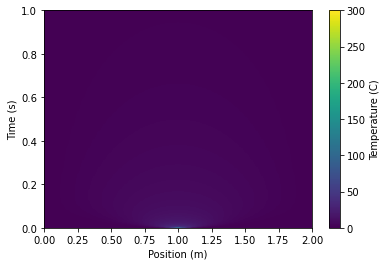

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 2  # Length of the rod
T0 = 300  # Initial temperature at the center
Tb = 0  # Boundary temperature
k = 1  # Thermal diffusivity, you may need to adjust this

# Grid points
Nx = 51  # Increase number of spatial grid points
Nt =5000   # Decrease number of time steps
x = np.linspace(0, L, Nx)  # Spatial grid
t = np.linspace(0, 1, Nt)  # Time grid

# Ensure stability condition
dx = x[1] - x[0]
dt = t[1] - t[0]
assert dt/dx**2 < 0.5, "Stability condition not met!"

# Initialize temperature array
u = np.zeros((Nt, Nx))
u[0, :] = Tb
u[0, Nx//2] = T0

# Time stepping
for n in range(Nt-1):
    for i in range(1, Nx-1):
        u[n+1, i] = u[n, i] + k*dt/dx**2 * (u[n, i-1] - 2*u[n, i] + u[n, i+1])
    u[n+1, 0] = u[n+1, -1] = Tb  # Boundary conditions

# Plot
plt.imshow(u, extent=[0, L, 0, 1], origin='lower', aspect='auto')
plt.colorbar(label='Temperature (C)')
plt.xlabel('Position (m)')
plt.ylabel('Time (s)')
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import root

# Constants
alpha = 0.01
Ta = 20
T0 = 40
TL = 200

# Differential equation
def diff_eq(y, x):
    T, z = y
    dydx = [z, alpha * (Ta - T)]
    return dydx

# Runge-Kutta 4 method
def rk4(func, y0, x):
    n = len(x)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = x[i+1] - x[i]
        k1 = h * np.asarray(func(y[i], x[i]))
        k2 = h * np.asarray(func(y[i] + k1/2, x[i] + h/2))
        k3 = h * np.asarray(func(y[i] + k2/2, x[i] + h/2))
        k4 = h * np.asarray(func(y[i] + k3, x[i] + h))
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

# Shooting method
def shooting(func, a, b, alpha, beta, U0, V0):
    def res(u):  # Boundary condition residual
        sol = rk4(func, [alpha, u], x)
        return sol[-1][0] - beta
    u = root(res, U0).x[0]
    sol = rk4(func, [alpha, u], x)
    return sol
# Solve BVP
L = 1  # Length of the rod
x = np.linspace(0, L, 100)  # x values
sol = lib.shooting(diff_eq, 0, L, T0, TL, U0=1, V0=1)

# Find x where T = 100 C
idx = np.abs(sol[:, 0] - 100).argmin()
x_100 = x[idx]

print(f'Temperature reaches 100 C at x = {x_100}')

AttributeError: module 'midsem_library' has no attribute 'shooting'

Question 4

Q) A 2 meter long beam has a linear mass density \lambda(x)=x**2, where x is measured from one end. find center of maas of the beam numericallu upto 4 decimal.

Outpot: The center of mass of the beam is at x = 1.5000 m

In [52]:
import numpy as np
from scipy.integrate import quad

# Define the linear mass density function
lambda_x = lambda x: x**2

# Define the limits of integration
a = 0  # Start of the beam
b = 2  # End of the beam

# Calculate the center of mass
mass, _ = quad(lambda_x, a, b)
center_of_mass, _ = quad(lambda x: x*lambda_x(x), a, b)
center_of_mass /= mass

# Print the center of mass
print(f'The center of mass of the beam is at x = {center_of_mass:.4f} m')

The center of mass of the beam is at x = 1.5000 m


5.LU DECOMPOSITION

In [53]:
A = [[1,-1,4,0,2,9],[0,5,-2,7,8,4],[1,0,5,7,3,-2],[6,-1,2,3,0,8],[-4,2,0,5,-5,3],[0,7,-1,5,4,-2]]
b = [19,2,13,-7,-9,2]

crout_result = ml.solveLU(A,b,1)
print("LU decomposition (via Crout's method):")
print("a_1 = " + str(crout_result[0]))
print("a_2 = " + str(crout_result[1]))
print("a_3 = " + str(crout_result[2]))
print("a_4 = " + str(crout_result[3]))
print("a_5 = " + str(crout_result[4]))
print("a_6 = " + str(crout_result[5]))

LU decomposition (via Crout's method):
a_1 = -1.7618170439978513
a_2 = 0.8962280338740127
a_3 = 4.0519314041161545
a_4 = -1.6171308025395394
a_5 = 2.0419135385019094
a_6 = 0.1518324871559364


In [54]:
#verifying the solution obtained from LU decomp
b_repeat = []
for i in range(len(crout_result)):
    row_sum = 0
    for j in range(len(A[i])):             
        row_sum += A[i][j]*crout_result[j] 
    b_repeat.append(row_sum)               
print("if b = b_repeat, then the obtained solution is correct:")
print(b_repeat)

if b = b_repeat, then the obtained solution is correct:
[19.0, 1.999999999999999, 13.0, -6.99999999999994, -9.000000000000004, 2.000000000000002]
